In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
data=boston.data
type(data)

numpy.ndarray

In [13]:
data.shape

(506, 13)

In [14]:
data=pd.DataFrame(data=data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
data["price"]=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [18]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

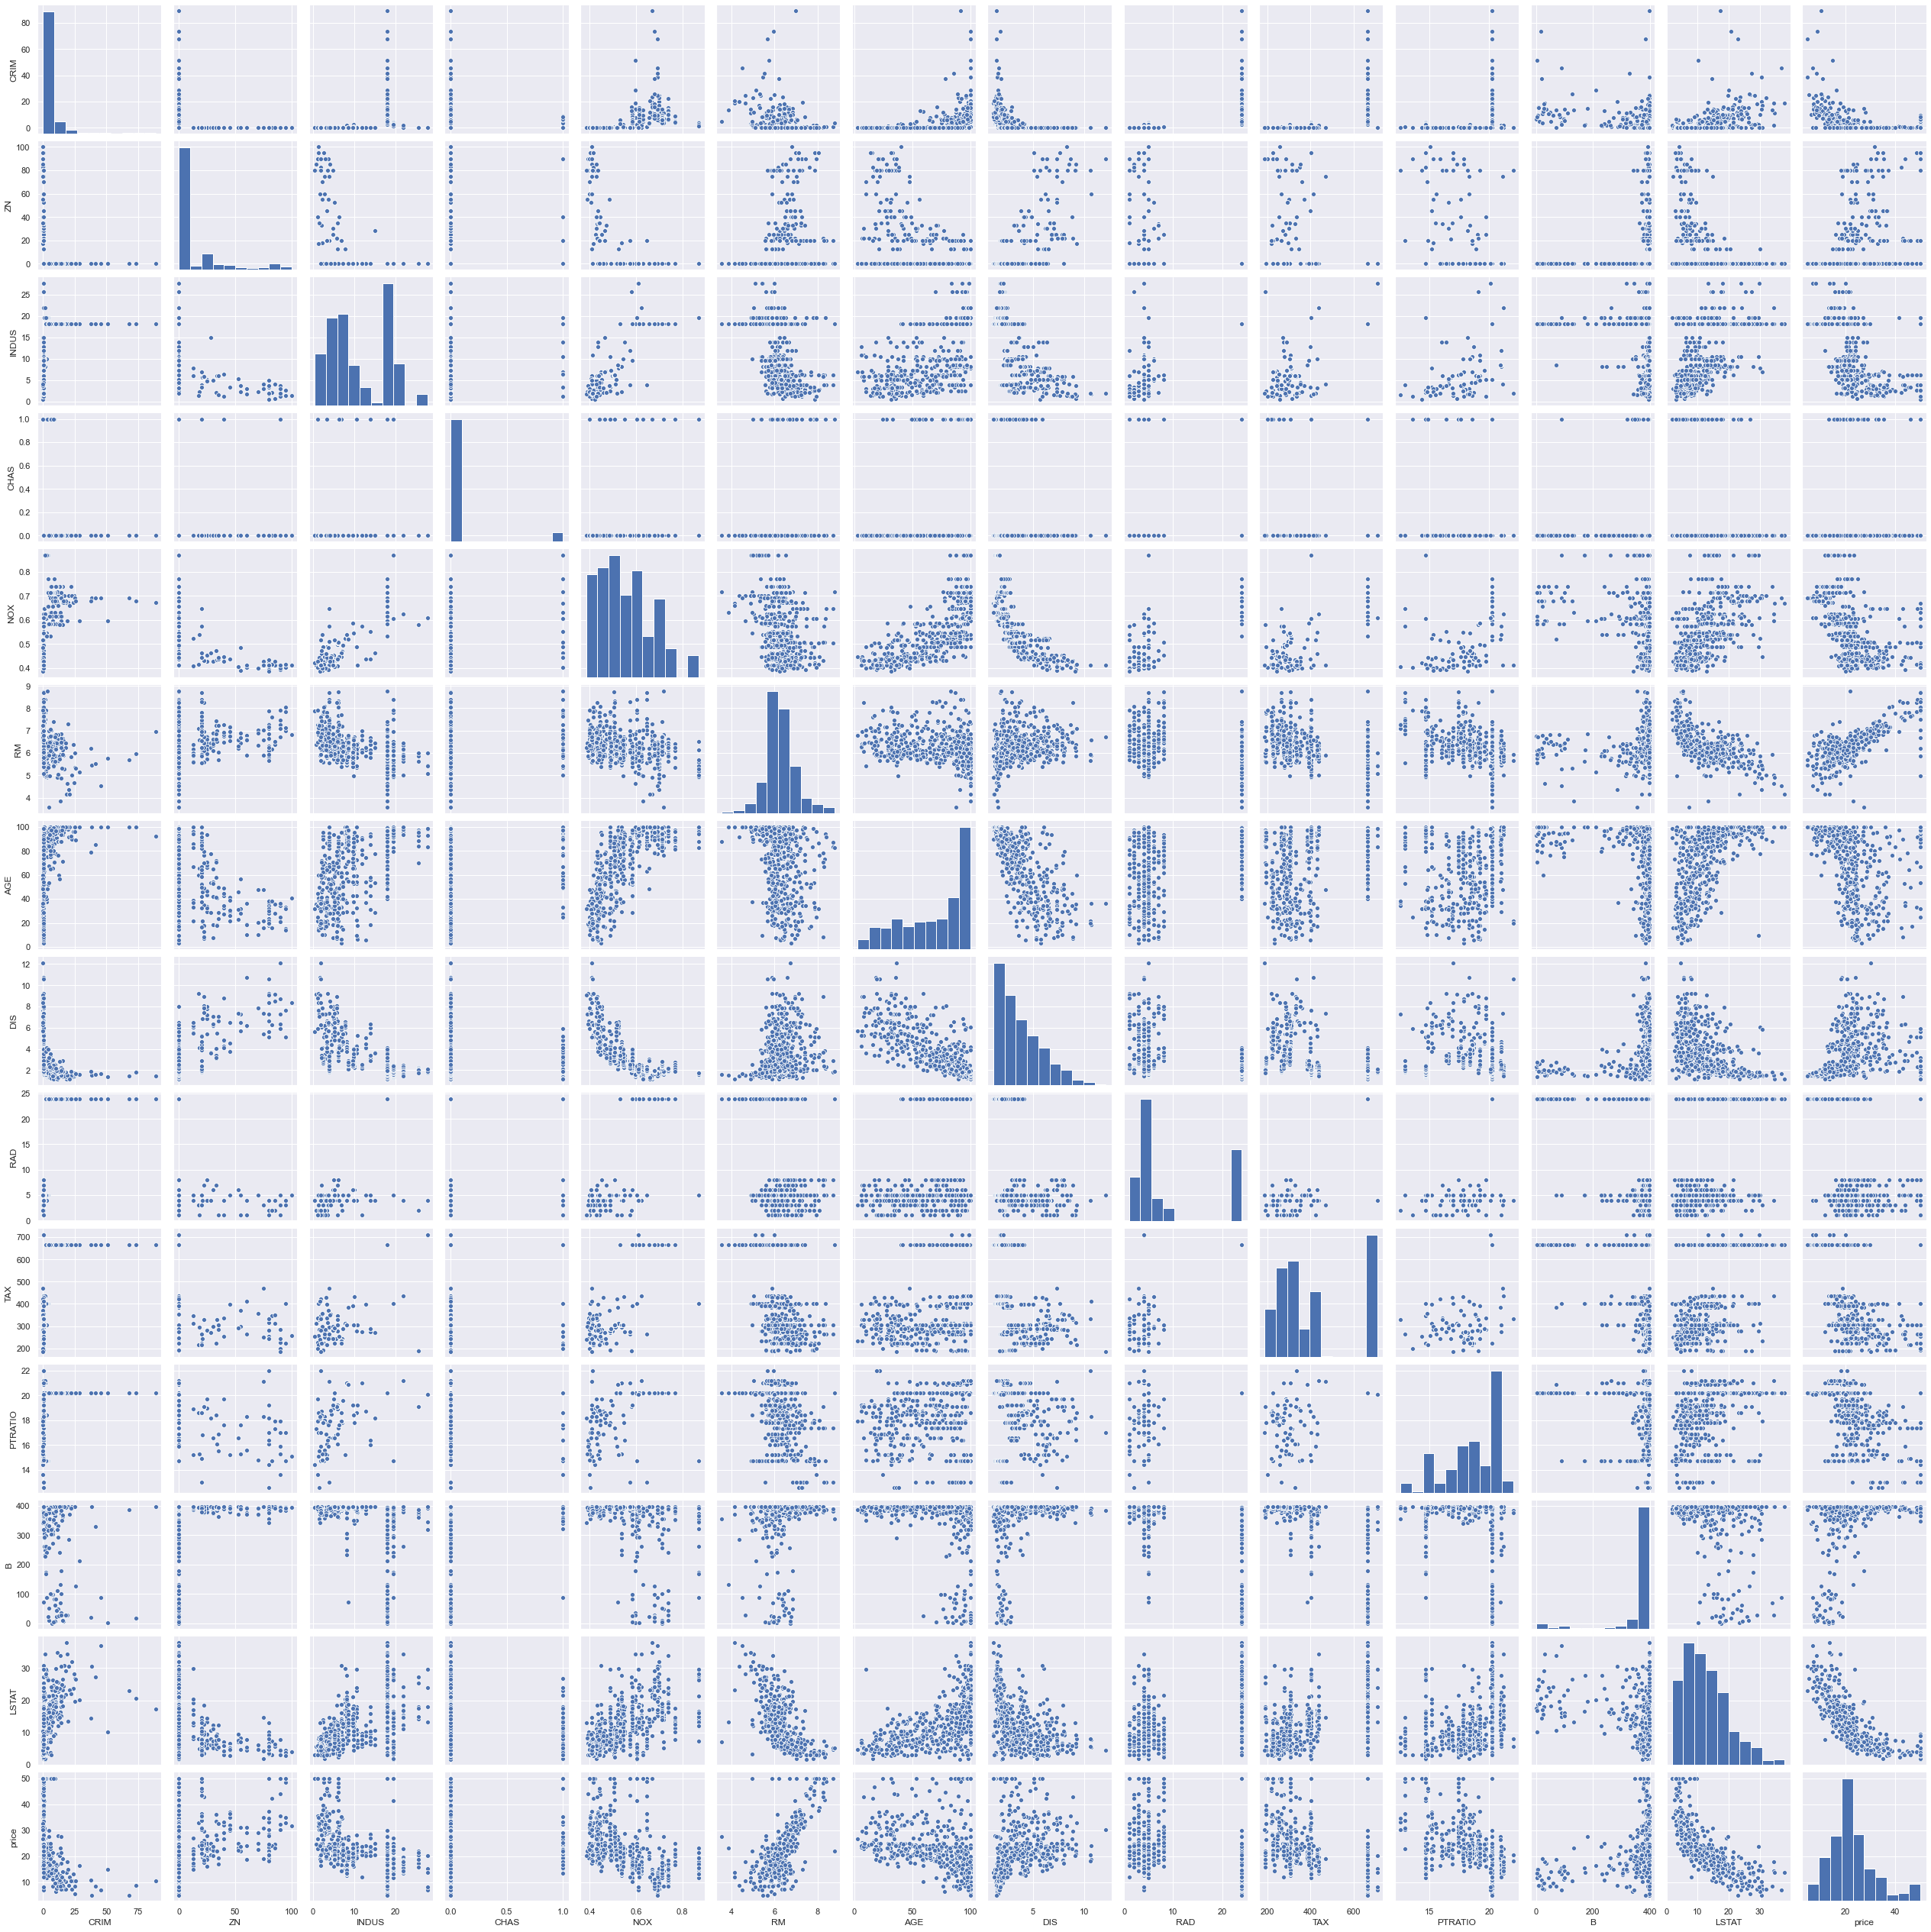

In [20]:
sns.pairplot(data)

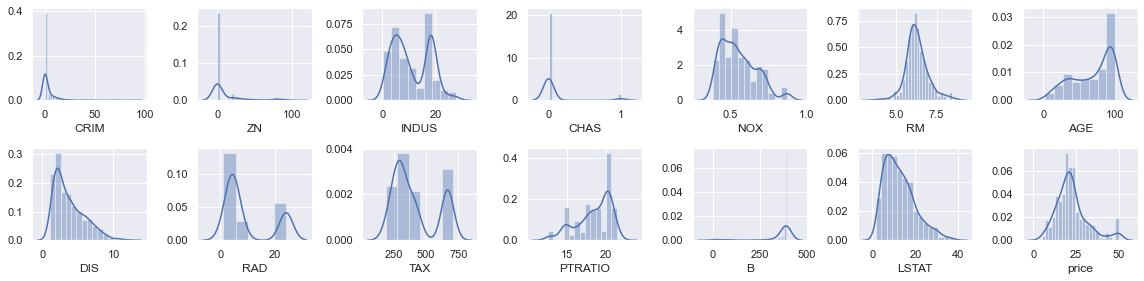

In [21]:
rows=2
cols=7
fig, ax= plt.subplots(nrows= rows, ncols=cols, figsize=(16,4))
col=data.columns
index=0
for i in range (rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [22]:
corrmat=data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


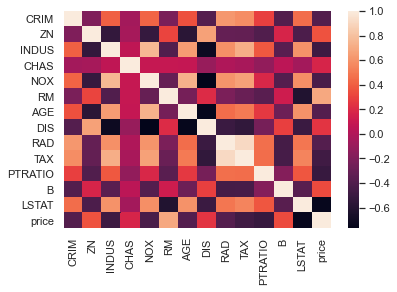

In [23]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(corrmat)

In [24]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'price'], dtype=object)

In [25]:
def getCorrelatedFeature(corrdata,thershold):
    feature=[]
    value=[]
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>thershold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    return df

In [26]:
thershold=0.50
corr_value=getCorrelatedFeature(corrmat['price'],thershold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
price,1.000000


In [27]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'price'], dtype=object)

In [28]:
correlated_data=data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_laayout'

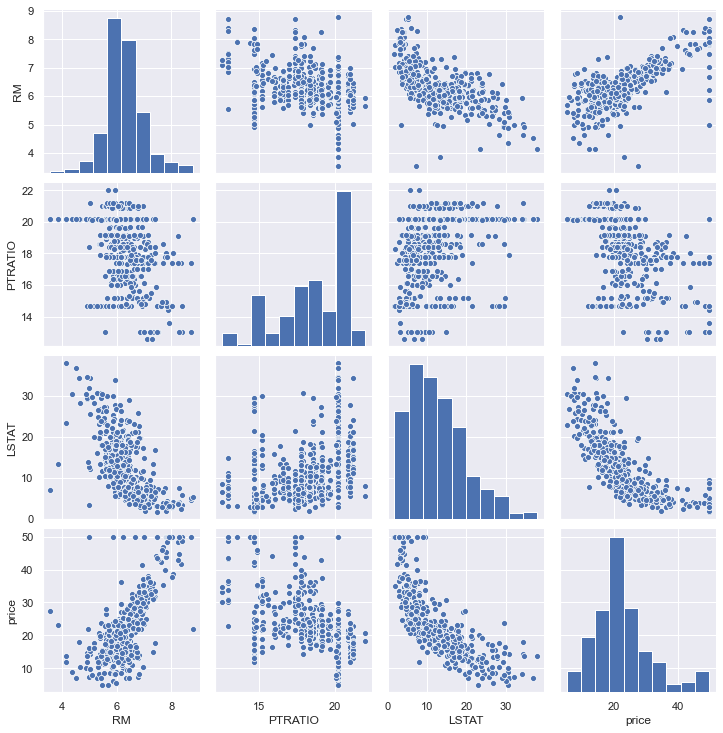

In [29]:
sns.pairplot(correlated_data)
plt.tight_laayout()

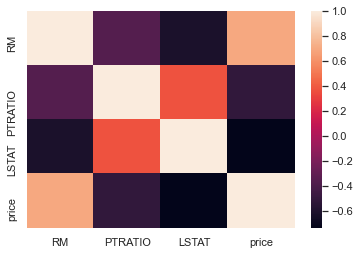

In [30]:
x = sns.heatmap(correlated_data.corr())

In [31]:
X=correlated_data.drop(labels=['price'],axis=1)
y=correlated_data['price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train.shape,X_test.shape

((404, 3), (102, 3))

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_predict=model.predict(X_test)


In [37]:
y_predict,y_test

(array([27.60903054, 22.09903399, 26.52925454, 12.50798575, 22.25487898,
        20.17063891, 19.66763431, 21.17945215, 17.05361787, 21.47645249,
        14.61188065, 17.25203106, 17.87834594,  4.63763054, 39.49396811,
        34.51171811, 21.51354177, 38.44114322, 30.01522647, 22.1120067 ,
        25.01756609, 25.47821806, 18.29949317, 27.53525285, 22.04425617,
         9.8766314 , 17.64455251, 22.58495171, 35.56415926, 19.94695236,
        17.07488901, 18.54782062, 23.03506219, 24.0227991 , 27.32559903,
        17.39669651, 11.20037267, 21.01877579, 17.99452878, 13.48338053,
        27.03969738, 20.22025653, 25.79579308, 13.77875148, 28.87448892,
        25.92551494, 21.42412497, 24.76182896, 11.37786561, 23.54614643,
        24.91747489, 16.26246249, 23.05899832, 35.50989662, 14.52731963,
        22.83041034, 22.00550472, 20.52680975, 19.80762071, 18.37114766,
        23.84391837, 21.86386107, 32.71351223, 30.0351469 , 16.94378867,
        32.09219353, 19.25207073, 22.18373343, 18.9

In [38]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


In [39]:
from sklearn.metrics import r2_score

In [40]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print('r2_ score:',score)
print('mae:',mae)
print('mse:',mse)

r2_ score: 0.48816420156925067
mae: 4.404434993909257
mse: 41.67799012221683


In [41]:
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]


In [56]:
def perfomance_metrices(features,th,y_true,y_pred):
    score=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    metrics_datatframe=pd.DataFrame(data=[total_features_name,total_features,selected_correlation_value,r2_scores,mae_value,mse_value],index=['features name','#feature','corr_value','MAE','MSE','as'])
    return metrics_datatframe.T

In [57]:
 perfomance_metrices(correlated_data.columns.values,thershold,y_test,y_predict)

,features name,#feature,corr_value,MAE,MSE,as
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
2,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
3,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
4,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
5,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
6,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,None,None,None


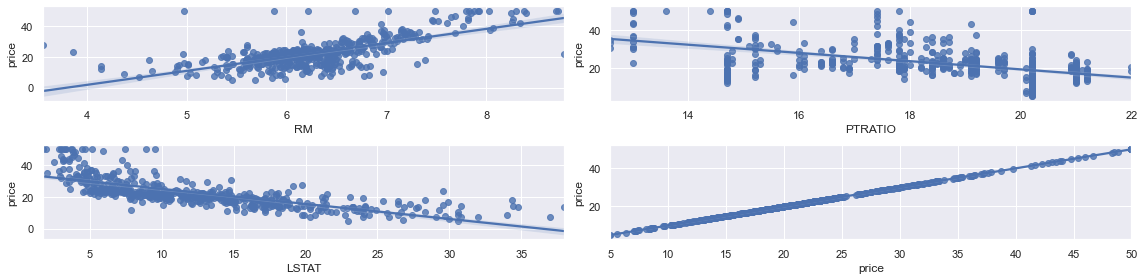

In [63]:
rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=correlated_data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['price'],ax=ax[i][j])
        index= index+1
fig.tight_layout()

In [64]:
corrmat['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

In [83]:
thershold=0.60
corr_value=getCorrelatedFeature(corrmat['price'],thershold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
price,1.000000


In [84]:
correlated_data=data[corr_value.index]
correlated_data.head()






,RM,LSTAT,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [92]:
def get_y_predict(corr_data):
    x=corr_data.drop(labels=['price'],axis=1)
    y=corr_data['price']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    return y_predict

In [93]:
y_predict=get_y_predict(correlated_data)

In [96]:
perfomance_metrices(correlated_data.columns.values,thershold,y_test,y_predict)

,features name,#feature,corr_value,MAE,MSE,as
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
2,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
3,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
4,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
5,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
6,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
7,['RM' 'LSTAT' 'price'],2,0.6,None,None,None


In [98]:
corrmat['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

In [99]:
thershold=0.70
corr_value=getCorrelatedFeature(corrmat['price'],thershold)
corr_value

,Corr Value
LSTAT,-0.737663
price,1.000000


In [100]:
correlated_data=data[corr_value.index]
correlated_data.head()

,LSTAT,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [101]:
y_predicts=get_y_predict(correlated_data)
perfomance_metrices(correlated_data.columns.values,thershold,y_test,y_predict)

,features name,#feature,corr_value,MAE,MSE,as
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
2,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
3,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
4,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
5,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
6,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
7,['RM' 'LSTAT' 'price'],2,0.6,0.488164,4.40443,41.678
8,['LSTAT' 'price'],1,0.7,None,None,None


In [103]:
correlated_data=data[['RM','price']]
correlated_data.head()

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [104]:
y_predicts=get_y_predict(correlated_data)
perfomance_metrices(correlated_data.columns.values,thershold,y_test,y_predict)

,features name,#feature,corr_value,MAE,MSE,as
0,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
2,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
3,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
4,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
5,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
6,['RM' 'PTRATIO' 'LSTAT' 'price'],3,0.5,0.488164,4.40443,41.678
7,['RM' 'LSTAT' 'price'],2,0.6,0.488164,4.40443,41.678
8,['LSTAT' 'price'],1,0.7,0.488164,4.40443,41.678
9,['RM' 'price'],1,0.7,None,None,None


In [106]:
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [107]:
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

0.4881642015692508

In [112]:
from sklearn.model_selection import learning_curve,ShuffleSplit

c:\users\abs81\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass groups=0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: Found input variables with inconsistent numbers of samples: [40, 506, 506]

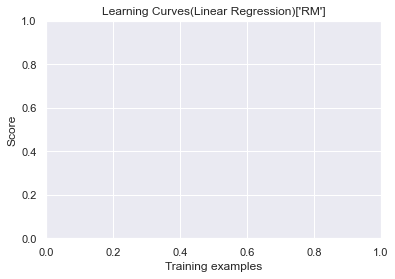

In [117]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,
                        train_sizes=np.linspace(.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores,test_scores=learning_curve(estimator,title,X,y,cv=cv,n_jobs=n_jobs,
                                                        train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    train_scores_mean=np.mean(test_scores,axis=1)
    train_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scorse_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scorse_std,test_scores_mean+test_scores_std,alpha=0.1,color='b')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Traning score")
    plt.plot(train_sizes,train_scores_mean,'o-',color='b',label="Cross-validation scores")
    plt.legend(loc='best')
    return plt
X=correlated_data.drop(labels=['price'],axis=1)
y=correlated_data['price']
title="Learning Curves(Linear Regression)"+str(X.columns.values)
cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator=LinearRegression()
plot_learning_curve(estimator,title,X,y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show